# WeatherPy
----

### Analysis
* In the submitted production notebook, 617 randomly generated lat/long combinations, worldwide, where matched to nearby cities via the citipy library.  The initial set of 617 cities was queried against the OpenWeather API in order to collect current (10/11/2018) weather conditions.  A total of 552 city queries returned valid, current weather data.  

* Maximum daily temperature for cities closer to the equator (latitude = 0 degrees) group higher than for cities further from the equator (shown by zero minus or zero plus latitude values on the X axis).  At the time of data collection from OpenWeather on the collection date, cities within the band of latitudes between +20 and -20 showed a grouping of temperatures significantly higher than those outside the +20/-20 band of cities.  Cities with latitudes approaching and only slightly exceeding +20 or -20 showed high temperature groupings that should be studied seperately with an eye on seasonal/hemishperic norms.  It should be noted that the effects of elevation and proximity to significant open water is not considered in this analysis.

* Visually, there appears to be no significant relationship between the measures of cloudiness and humidity and the latitude of a city. Significant groupings do exist at certain, round number measures of these attributes, a phenomena most likely created by certain process rules for the categorization of these measures.

* Further study is warrented with additional, longitudinal observations and the introduction of elevation, proximity to open water, and prevailing wind data.


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
at_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# prep writer for csv output -- test local cities.csv first
#with open('cities.csv', 'w') as cities:
#          writer = csv.writer(cities)
#          writer.writerow('')
# Identify nearest city for each lat, lng combination
    
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list 
    if city not in cities:
        cities.append(city)

#len(cities)
cities_len = len(cities)
cities_len

617

In [4]:
# check cities list
for city in cities:
    print(city)

kalianget
hilo
opuwo
ambulu
souillac
salekhard
butaritari
dikson
ribeira grande
mataura
port augusta
belushya guba
qaanaaq
hermanus
nome
yarmouth
puerto ayora
chapais
nikolskoye
tazmalt
bluff
cape town
punta arenas
saskylakh
atuona
mahebourg
thinadhoo
vaini
saleaula
nanortalik
merauke
waipawa
chifeng
torbat-e jam
albany
valparaiso
khatanga
mar del plata
chuy
kaz
bethel
khlong luang
taltal
illoqqortoormiut
boissevain
upernavik
nyurba
haines junction
burica
kaitangata
aripuana
jalu
daru
dali
kiomboi
nazira
antofagasta
kapaa
iracoubo
ushuaia
shingu
harlingen
kuala terengganu
taolanaro
erzin
sept-iles
new norfolk
provideniya
hithadhoo
vestmannaeyjar
vila
sao gabriel da cachoeira
hobart
talnakh
vardo
narsaq
kudahuvadhoo
grindavik
aasiaat
thompson
manjacaze
yellowknife
acapulco
lagoa
cherskiy
sironj
lagos
san cristobal
qianjiang
tuktoyaktuk
longyearbyen
hami
arraial do cabo
brokopondo
port alfred
caravelas
busselton
bonavista
baherden
esperance
sentyabrskiy
yar-sale
tumannyy
rikitea
saint-fr

In [9]:
# create cities_trunc n=10 for testing
cities_trunc = cities[:10]
len(cities_trunc)
ct_len = len(cities_trunc)
ct_len

10

In [9]:
# output cities.csv -- not certain yet I need to take this step -- do need writer,after response data generated
with open('cities.csv','w', newline = '') as out:
    writer=csv.writer(out, quoting=csv.QUOTE_ALL)

    for city in cities:
        writer.writerow(cities)


In [6]:
# check cities_trunc list
for city in cities_trunc:
    print(city)

barrow
afonso claudio
bharatpur
vaitupu
chapais
niceville
bluff
kavaratti
ambovombe
ushuaia


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# build request query with url, units, api key then iterate through [cities] to generate response

# create empty lists for response data

city_ow = []
cloudiness_pct = []
country = []
date = []
humidity_pct = []
lat_ow = []
lon_ow = []
max_temp = []
wind_speed = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

count = 1
for city in cities:
    
    # Build query URL and request
    response = requests.get(query_url + city).json()
    try:
        # append list values with try statement for fail
        city_ow.append(response['name'])
        cloudiness_pct.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity_pct.append(response['main']['humidity'])
        lat_ow.append(response['coord']['lat'])
        lon_ow.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record: {count} of {cities_len} | {city}")
    except:
        print(f"Failed to Find Rec: {count} of {cities_len} | {city}")
    count = count+1

Failed to Find Rec: 1 of 617 | saryshagan
Processing Record: 2 of 617 | hithadhoo
Processing Record: 3 of 617 | ushuaia
Processing Record: 4 of 617 | barrow
Processing Record: 5 of 617 | rikitea
Processing Record: 6 of 617 | busselton
Processing Record: 7 of 617 | zhigansk
Processing Record: 8 of 617 | puerto ayora
Processing Record: 9 of 617 | cockburn town
Failed to Find Rec: 10 of 617 | acarau
Processing Record: 11 of 617 | bridgetown
Processing Record: 12 of 617 | auki
Processing Record: 13 of 617 | cidreira
Failed to Find Rec: 14 of 617 | khonuu
Processing Record: 15 of 617 | padong
Processing Record: 16 of 617 | kodiak
Processing Record: 17 of 617 | chicama
Processing Record: 18 of 617 | la asuncion
Processing Record: 19 of 617 | rabo de peixe
Failed to Find Rec: 20 of 617 | bengkulu
Processing Record: 21 of 617 | albany
Processing Record: 22 of 617 | bluff
Processing Record: 23 of 617 | umm kaddadah
Processing Record: 24 of 617 | pakxe
Processing Record: 25 of 617 | hilo
Process

Processing Record: 201 of 617 | broome
Processing Record: 202 of 617 | bonavista
Processing Record: 203 of 617 | namatanai
Processing Record: 204 of 617 | pokhara
Processing Record: 205 of 617 | pangnirtung
Failed to Find Rec: 206 of 617 | viligili
Failed to Find Rec: 207 of 617 | tsihombe
Processing Record: 208 of 617 | rawson
Processing Record: 209 of 617 | saint-joseph
Processing Record: 210 of 617 | severo-kurilsk
Failed to Find Rec: 211 of 617 | skaerbaek
Processing Record: 212 of 617 | brodokalmak
Processing Record: 213 of 617 | mount isa
Processing Record: 214 of 617 | airai
Processing Record: 215 of 617 | tura
Processing Record: 216 of 617 | whitehorse
Processing Record: 217 of 617 | palu
Processing Record: 218 of 617 | bemidji
Processing Record: 219 of 617 | maun
Processing Record: 220 of 617 | lebu
Processing Record: 221 of 617 | hokitika
Processing Record: 222 of 617 | langham
Processing Record: 223 of 617 | alyangula
Processing Record: 224 of 617 | tilichiki
Processing Reco

Processing Record: 399 of 617 | kapiri mposhi
Processing Record: 400 of 617 | aden
Processing Record: 401 of 617 | bo rai
Processing Record: 402 of 617 | palestine
Processing Record: 403 of 617 | moose factory
Processing Record: 404 of 617 | poum
Processing Record: 405 of 617 | ponta do sol
Processing Record: 406 of 617 | dryden
Processing Record: 407 of 617 | altagracia de orituco
Processing Record: 408 of 617 | kruisfontein
Processing Record: 409 of 617 | kangaatsiaq
Processing Record: 410 of 617 | kishtwar
Processing Record: 411 of 617 | leticia
Processing Record: 412 of 617 | tadine
Processing Record: 413 of 617 | abu samrah
Failed to Find Rec: 414 of 617 | duz
Processing Record: 415 of 617 | ugoofaaru
Processing Record: 416 of 617 | shingu
Processing Record: 417 of 617 | havelock
Processing Record: 418 of 617 | tabora
Processing Record: 419 of 617 | mus
Processing Record: 420 of 617 | amapa
Processing Record: 421 of 617 | taikang
Processing Record: 422 of 617 | nakasongola
Process

Processing Record: 595 of 617 | yining
Processing Record: 596 of 617 | pochutla
Processing Record: 597 of 617 | huarmey
Processing Record: 598 of 617 | nishihara
Processing Record: 599 of 617 | dinhata
Processing Record: 600 of 617 | tokur
Processing Record: 601 of 617 | nizhniy odes
Failed to Find Rec: 602 of 617 | zachagansk
Processing Record: 603 of 617 | komsomolskiy
Processing Record: 604 of 617 | enfield
Processing Record: 605 of 617 | buala
Processing Record: 606 of 617 | kudahuvadhoo
Processing Record: 607 of 617 | lavrentiya
Processing Record: 608 of 617 | tocopilla
Processing Record: 609 of 617 | sao joao da barra
Processing Record: 610 of 617 | honningsvag
Processing Record: 611 of 617 | rocha
Processing Record: 612 of 617 | yatou
Processing Record: 613 of 617 | basco
Processing Record: 614 of 617 | newport
Processing Record: 615 of 617 | valdivia
Processing Record: 616 of 617 | povenets
Processing Record: 617 of 617 | aci castello


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create data dictionary, create df from dictionary
weather_dict = {
      "City": city_ow,
      "Cloudiness": cloudiness_pct,
      "Country": country,
      "Date": date,
      "Humidity": humidity_pct,
      "Lat": lat_ow,
      "Lng": lon_ow,
      "Max Temp": max_temp,
      "Wind Speed": wind_speed
}        
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,48,MV,1539312115,98,-0.60,73.08,84.15,4.72
1,Ushuaia,75,AR,1539309600,45,-54.81,-68.31,48.20,8.05
2,Barrow,92,AR,1539312115,47,-38.31,-60.23,51.26,6.85
3,Rikitea,92,PF,1539312116,100,-23.12,-134.97,70.92,13.22
4,Busselton,92,AU,1539312101,100,-33.64,115.35,62.73,12.44


In [12]:
weather_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,552.000000,5.520000e+02,552.000000,552.000000,552.000000,552.000000,552.000000
mean,46.389493,1.539311e+09,79.840580,21.673315,14.226014,58.641341,8.301812
std,37.254003,1.256245e+03,18.580671,33.194081,90.943383,18.246357,5.663015
min,0.000000,1.539308e+09,11.000000,-54.810000,-179.170000,2.210000,0.360000
25%,1.000000,1.539310e+09,67.000000,-5.587500,-68.362500,44.600000,3.710000
50%,48.000000,1.539312e+09,85.000000,27.875000,14.395000,60.800000,6.930000
75%,80.000000,1.539312e+09,95.000000,49.697500,92.240000,73.432500,11.410000
max,100.000000,1.539312e+09,100.000000,78.220000,179.320000,89.600000,36.370000


In [13]:
weather_data_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

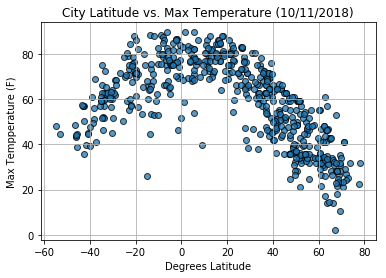

In [14]:
# Plot #1 -- Lat x Temp. use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Max Temp'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 0.5)
plt.title("City Latitude vs. Max Temperature (10/11/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Max Tempperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

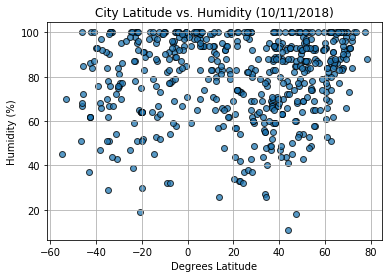

In [15]:
# Plot #2, Lat x Humidity.  use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 1.0)
plt.title("City Latitude vs. Humidity (10/11/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

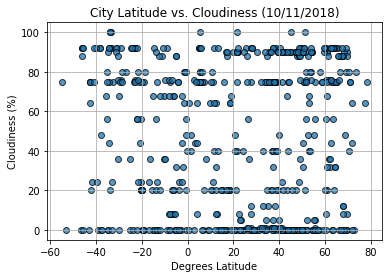

In [16]:
# Plot #3, Lat x Cloudiness.  use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 1.0)
plt.title("City Latitude vs. Cloudiness (10/11/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

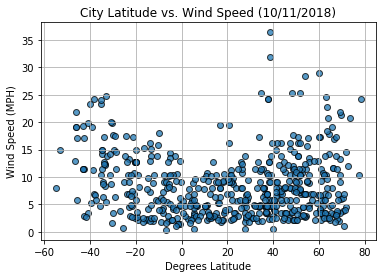

In [17]:
# Plot #4, Lat x Wind Speed.  use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 1.0)
plt.title("City Latitude vs. Wind Speed (10/11/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.show()